## 08 그래프만들기

### 산점도 막대그래프 시계열그래프 상자그림

<Axes: xlabel='timepoint', ylabel='signal'>

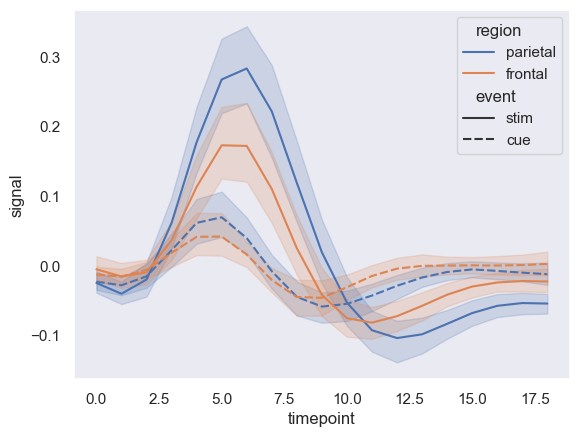

In [1]:
import seaborn as sns
sns.set_theme(style="dark")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


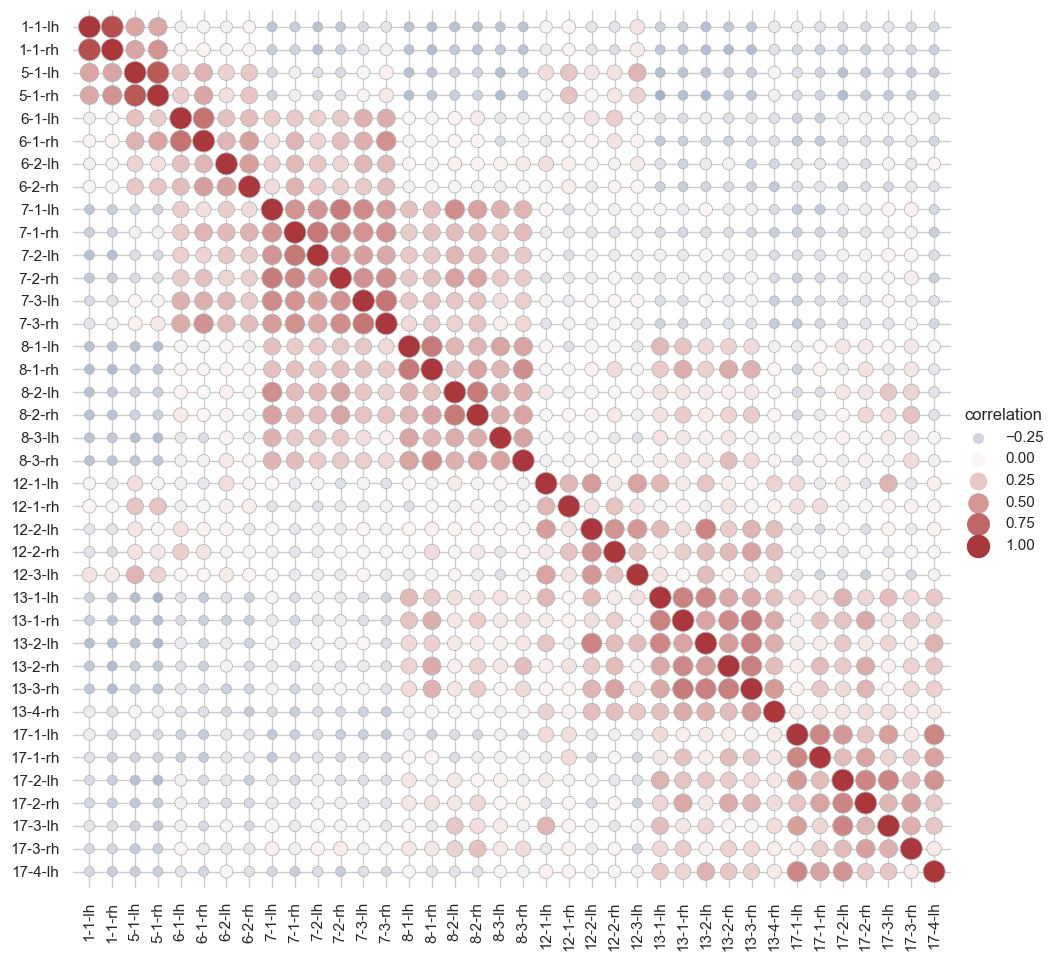

In [2]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_13996\364883338.py:32: UserWarning: The figure layout has changed to tight
  grid.fig.tight_layout(w_pad=1)


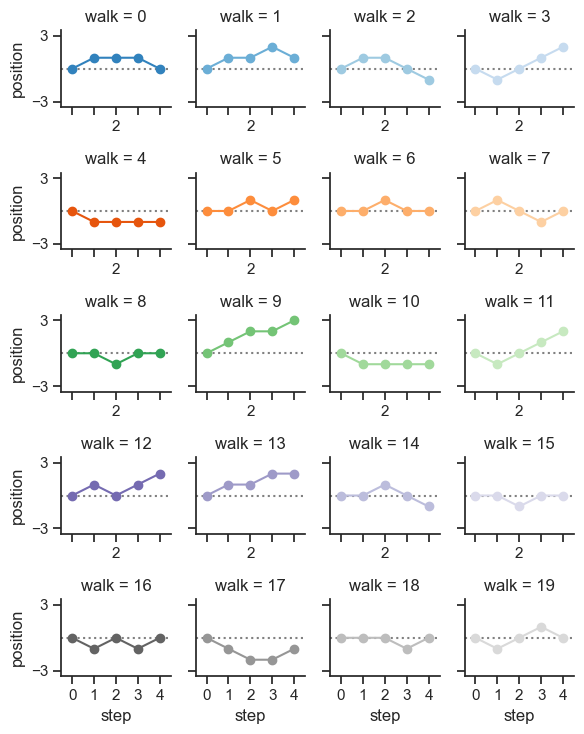

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [4]:
import pandas as pd
mpg=pd.read_csv('mpg.csv')

In [5]:
import seaborn as sns

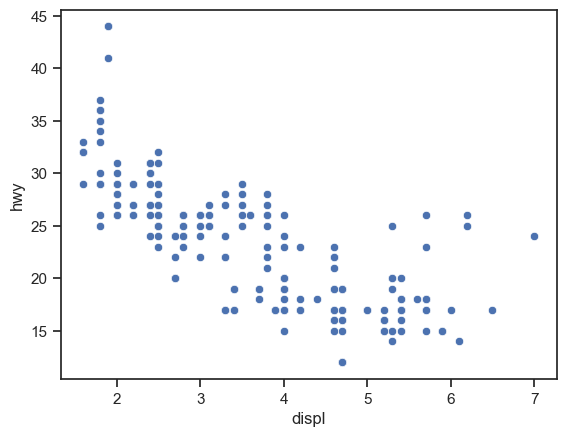

In [6]:
sns.scatterplot(data=mpg, x='displ', y='hwy')
sns.set_theme(style="whitegrid")

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


[(3.0, 6.0), (10.0, 30.0)]

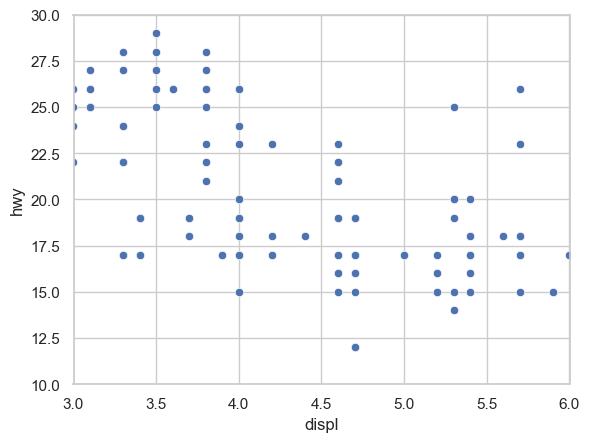

In [8]:
# 5이하 혹은 4미만 등 셋팅 설정

sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim=(3,6),ylim=(10,30))

<Axes: xlabel='displ', ylabel='hwy'>

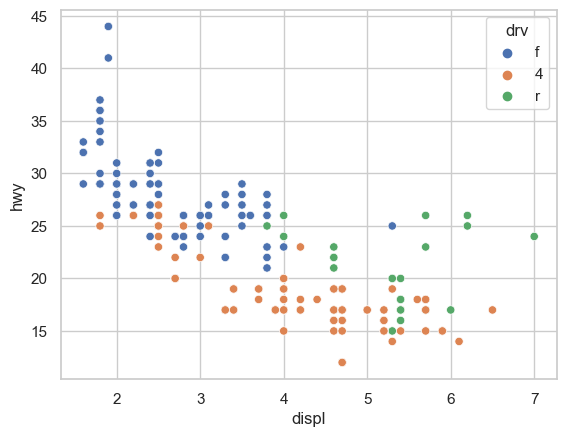

In [9]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

# Lab1 나혼자 해보기

### mpg데이터에서 도시연비와 고속도로 연비 사이의 관계를 알아보기

<Axes: xlabel='cty', ylabel='hwy'>

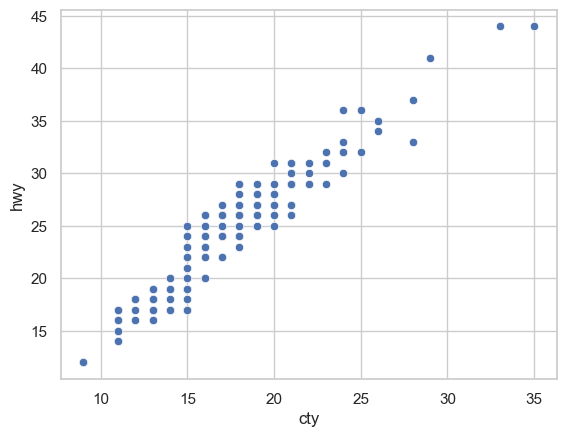

In [10]:
sns.scatterplot(data=mpg, x='cty', y='hwy' )

## 미국지역별 인구 정보 데이터를 이용하여 분석
* X축은 지역별 전체 인구
* y축은 아시아계 인구
* 전체인구는 50만명 이하, 아시아 인구는 1만명 이하 지역만 산점도에 표시

In [11]:
midwest=pd.read_csv('midwest.csv')

[(0.0, 300000.0), (0.0, 10000.0)]

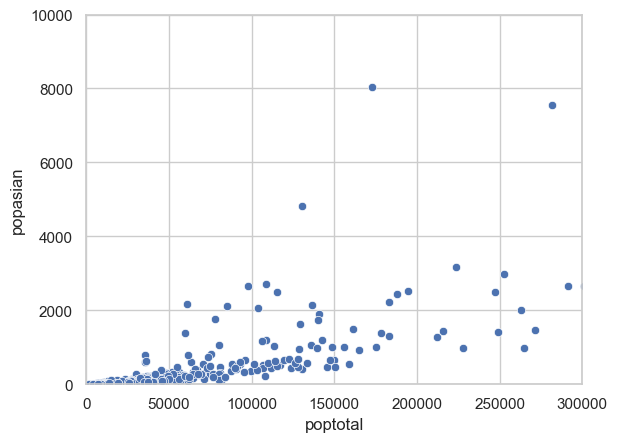

In [12]:
sns.scatterplot(data=midwest, x='poptotal', y='popasian').set(xlim=(0,300000),ylim=(0,10000))

# 8-3 막대그래프 - 집단 간 차이 표현하기

In [13]:
mpg=pd.read_csv('mpg.csv')

In [14]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

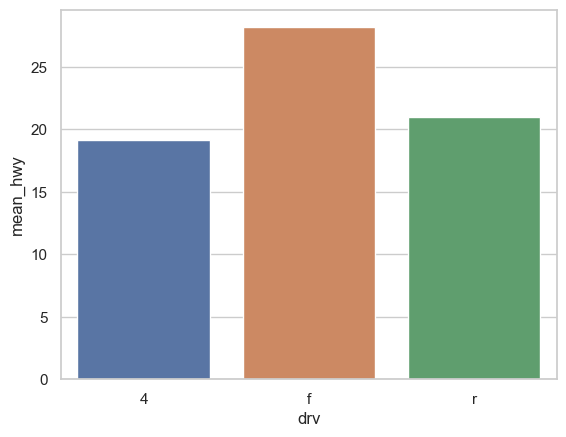

In [15]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [16]:
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


In [17]:
# 크기순으로 정렬

df_mpg=df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<Axes: xlabel='drv', ylabel='mean_hwy'>

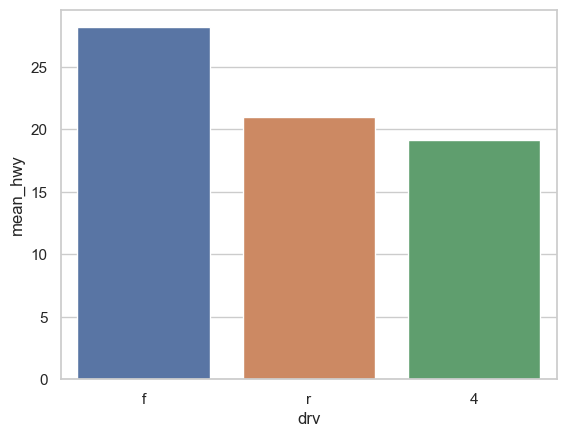

In [18]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

# Lab3 혼자해보기

# Q1: 'suv' 차종을 대상으로 도시연비 평균이 가장 높은 회사 다섯곳을 막대그래프로 그리기

In [19]:
mpg=pd.read_csv('mpg.csv')

In [20]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
#suv차량 추출

mpg.query('category=="suv"').head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [22]:
# 회사별로 집단에 대해 도시연비 평균을 구함


df = mpg.query('category=="suv"')\
    .groupby('manufacturer', as_index=False)\
    .agg(mean_cty=('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False).head(5)
    

In [23]:
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

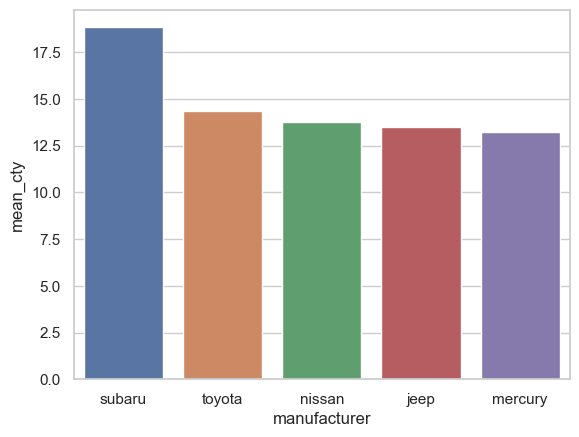

In [24]:
sns.barplot(data=df, x='manufacturer', y='mean_cty')

# Q2: 자동차 중 어떤 카테고리의 차가 많은지 알아보려고 함
 
 * 자동차 종류별 빈도를 막대그래프로 그리기
 * 막대는 빈도가 높은 순으로 정렬

In [25]:
mpg.groupby('category', as_index=False)\
    .agg(n=('category','count'))

,category,n
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [26]:
mpg.groupby('category', as_index=False)\
    .agg(n=('category', 'count'))\
    .sort_values('n', ascending=False)

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


In [27]:
df=mpg.groupby('category', as_index=False)\
        .agg(n= ('category', 'count'))\
        .sort_values('n', ascending=False)

<Axes: xlabel='category', ylabel='n'>

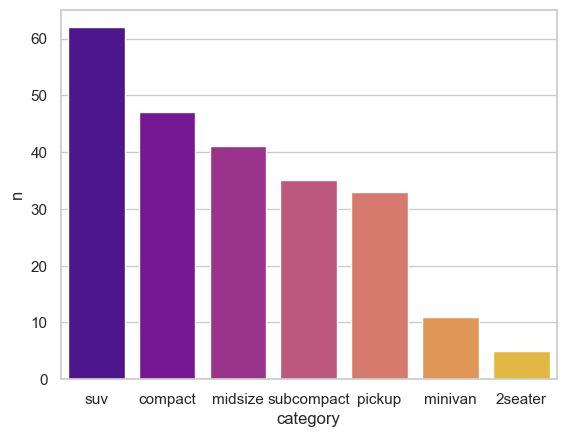

In [42]:
sns.barplot(data=df, x='category', y='n', palette="plasma")

# 시계열 그래프 만들기

In [43]:
import pandas as pd

economics=pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [49]:
economics.tail()

,date,pce,pop,psavert,uempmed,unemploy
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504
573,2015-04-01,12193.8,320402.295,7.6,11.5,8526


In [44]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [47]:
economics.describe(include="all")

,date,pce,pop,psavert,uempmed,unemploy
count,574,574.000000,574.000000,574.000000,574.000000,574.000000
unique,574,NaN,NaN,NaN,NaN,NaN
top,1967-07-01,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,4820.092683,257159.652662,8.567247,8.608711,7771.310105
std,NaN,3556.803613,36682.398508,2.964179,4.106645,2641.959180
min,NaN,506.700000,198712.000000,2.200000,4.000000,2685.000000
25%,NaN,1578.300000,224896.000000,6.400000,6.000000,6284.000000
50%,NaN,3936.850000,253060.000000,8.400000,7.500000,7494.000000
75%,NaN,7626.325000,290290.750000,11.100000,9.100000,8685.500000


In [46]:
economics.shape

(574, 6)

<Axes: xlabel='date', ylabel='unemploy'>

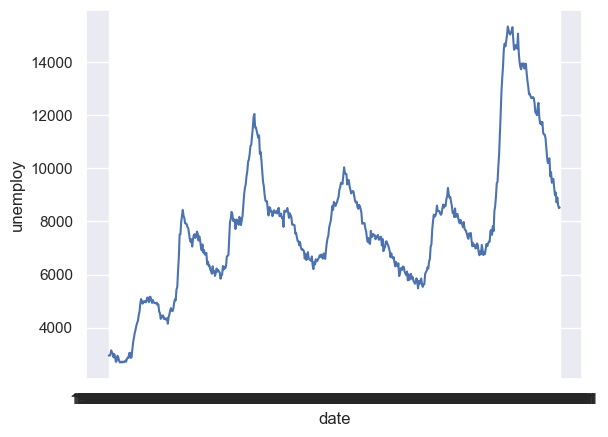

In [48]:
import seaborn as nsn

sns.set_style('darkgrid')
sns.lineplot(data=economics, x="date", y="unemploy")

# date (str)을 숫자로 변경

In [50]:
# x축에 연도 표시

economics['date2'] = pd.to_datetime(economics['date'])

In [51]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [56]:
economics[['date','date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [57]:
economics['date2'].dt.year


0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [58]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [59]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [60]:
economics['year']=economics['date2'].dt.year
economics

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967-11-01,1967
...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014-12-01,2014
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015-01-01,2015
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015-02-01,2015
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015-03-01,2015


In [62]:
economics['month']=economics['date2'].dt.month
economics['day']=economics['date2'].dt.day
economics.head(3)

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month,day
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7,1
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8,1
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9,1


### x축에 연도 표기하기

* 면적으로 표시된 부분은 신뢰구간 

<Axes: xlabel='year', ylabel='unemploy'>

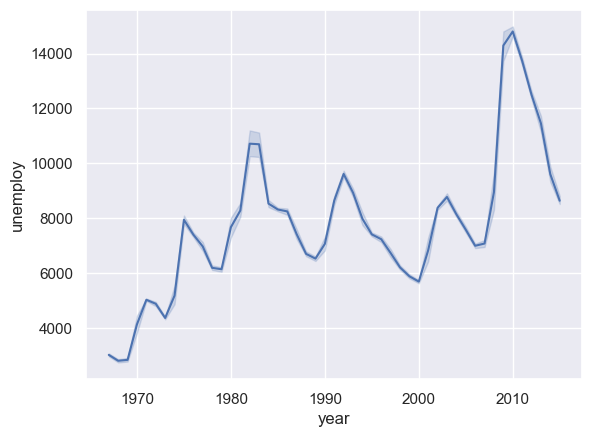

In [65]:
sns.lineplot(data=economics, x='year', y='unemploy')

# economics 데이터 분석 그래프 만들기

In [66]:
import pandas as pd
import seaborn as sns
economics=pd.read_csv('economics.csv')

In [68]:
economics['date2']=pd.to_datetime(economics['date'])

In [69]:
economics['year']=economics['date2'].dt.year

In [70]:
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='psavert'>

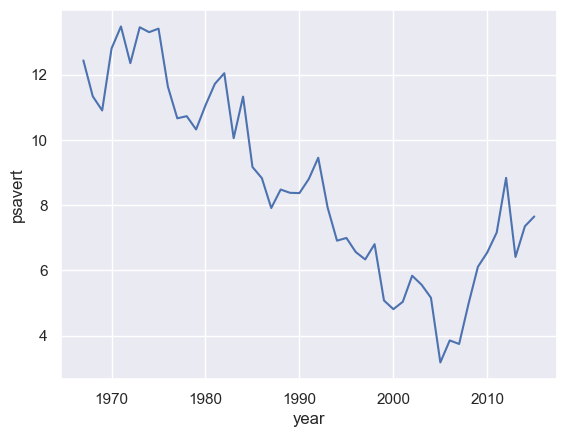

In [71]:
sns.lineplot(data=economics, x='year', y='psavert', errorbar=None)

# q2: 2014년 월별 개인저축률의 변화를 시계열 그래프로

In [72]:
economics['month']=economics['date2'].dt.month

In [73]:
df_2014=economics.query('year==2014')
df_2014.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


<Axes: xlabel='month', ylabel='psavert'>

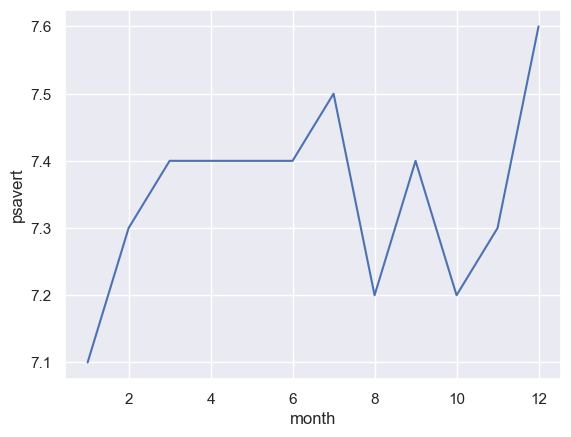

In [82]:
sns.lineplot(data=df_2014, x='month', y="psavert")

In [83]:
mpg = pd.read_csv('mpg.csv')

In [84]:
df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category  
honda         civic               1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
chevrolet     c1500 suburban 2wd  5.3    2008  8    auto(l4)    r    14   20   r   suv           2
ford          explorer 4wd        4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         durango 4wd         4.7    2008  8    auto(l5)    4    13   17   r   suv           2
subaru        impreza awd         2.5    2008  4    auto(s4)    4    20   27   r   compact       1
                                                                                                ..
ford          mustang             4.6    1999  8    manual(m5)  r    15   22   r   subcompact    1
                                                    auto(l4)    r    15   21   r   subcompact    1
                                  4.0    2008  6    manual(m5)  r    17   26   r   subcompact    1
               

<Axes: xlabel='category', ylabel='cty'>

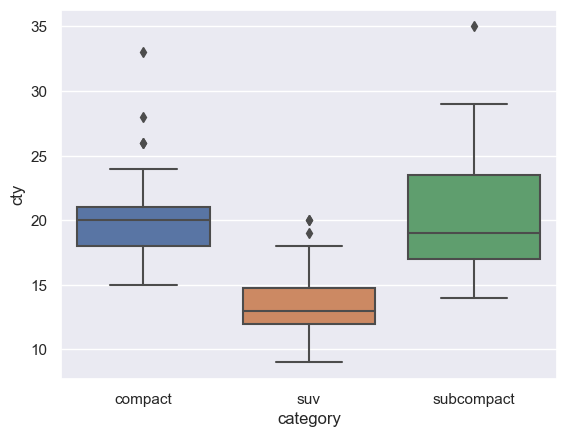

In [85]:
sns.boxplot(data=df, x="category", y="cty")

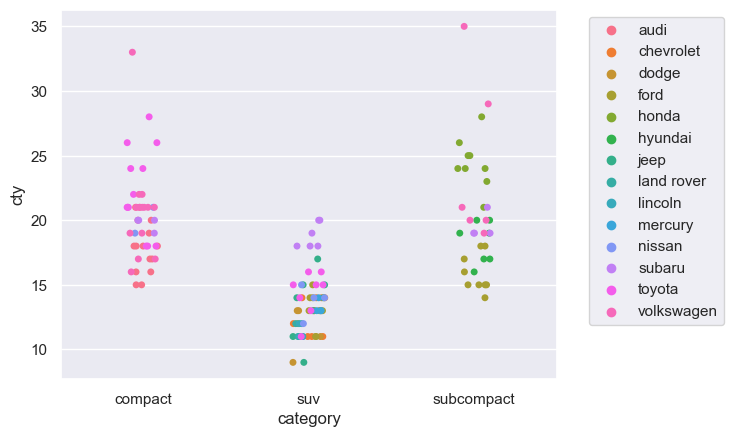

In [91]:
sns.stripplot(data=df, x='category', y='cty', hue='manufacturer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')